In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [251]:
def overlapping_curves(data1, data2, label1, label2, path=None):
    all_data = [data1, data2]
    bins = np.linspace(np.min(all_data), np.max(all_data), len(data) // 10)
    plt.hist(data1, label=label1, color="red", alpha=0.5, bins=bins)
    plt.hist(data2, label=label2, color="blue", alpha=0.5, bins=bins)
    plt.xlabel("Effect Size")
    plt.ylabel("Frequency")
    plt.legend()
    if path is None:
        plt.show()
    else:
        plt.savefig(path)
def resample(samp):
    return np.random.choice(samp, samp.size)
def bootstrap_diff(samp1, samp2):
    return np.mean(resample(samp1)) - np.mean(resample(samp2))
def two_sided_p_value(one_side):
    if one_side > 0.5:
        one_side = 1 - one_side
    return one_side * 2

In [269]:
np.random.seed(0)

In [270]:
new_drug = np.random.randn(500) + 2.05
placebo = np.random.randn(500) + 2

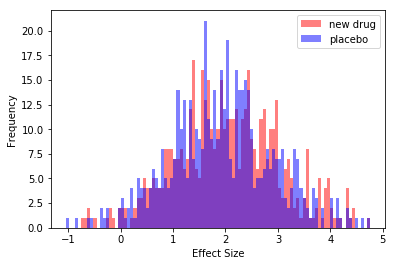

In [271]:
overlapping_curves(new_drug, placebo, "new drug", "placebo", path='drug_vs_placebo.png')

In [290]:
np.random.seed(0)
boot_diffs = np.array([bootstrap_diff(new_drug, placebo) for _ in range(10000)])
two_sided_p_value(np.mean(boot_diffs < 0))

0.0

In [297]:
np.random.seed(0)
new_drug = np.random.randn(10000) + 2.05
placebo = np.random.randn(10000) + 2

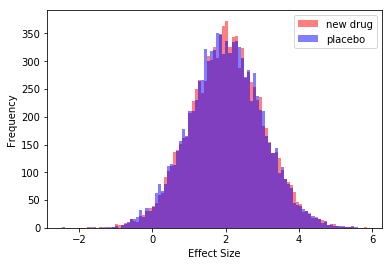

In [298]:
overlapping_curves(new_drug, placebo, "new drug", "placebo", path='drug_vs_placebo_large_n.png')

In [299]:
np.random.seed(0)
boot_diffs = np.array([bootstrap_diff(new_drug, placebo) for _ in range(100000)])
two_sided_p_value(np.mean(boot_diffs < 0))

0.13966000000000001

(array([  1.70000000e+01,   3.54000000e+02,   3.09800000e+03,
          1.41880000e+04,   3.02140000e+04,   3.15220000e+04,
          1.60670000e+04,   4.04400000e+03,   4.63000000e+02,
          3.30000000e+01]),
 array([-0.04127533, -0.02906073, -0.01684612, -0.00463152,  0.00758308,
         0.01979769,  0.03201229,  0.0442269 ,  0.0564415 ,  0.06865611,
         0.08087071]),
 <a list of 10 Patch objects>)

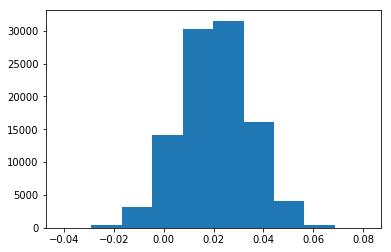

In [300]:
plt.hist(boot_diffs)